In [1]:
import pandas as pd
data_ready = pd.read_csv('../dataset/cleaned_dataset.csv')

# Data Preparation

In [2]:
#convert emoji to text
import emoji

# Function to convert emojis into text
def convert_emojis_to_text(text):
    return emoji.demojize(text)

# Apply the function to convert emojis to text in the 'tweet' column
data_ready['tweet'] = data_ready['tweet'].apply(convert_emojis_to_text)

In [3]:
#remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

stop_words = stopwords.words('english')
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt", "MENTIONHERE","HTTPURL",'httpurl']
stopwords.extend(other_exclusions)

def remove_stopwords(text):
    # Define the regular expression pattern to match words with boundaries, including symbols
    word_tokens = re.findall(r'\b\w+\b|\W', text)

    # Filter out stopwords while preserving symbols
    filtered_text = [word for word in word_tokens if word.lower() not in stopwords or not word.isalpha()]

    # Join the filtered words back into a string
    return ''.join(filtered_text)

data_ready['tweet'] = data_ready['tweet'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /Users/luohy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data_ready

,label,tweet,label_category
0,2,!!! @mayasolovely: woman ' complain clean...,Neutral
1,1,!!!!! @mleew17: boy dats cold...tyga dwn bad ...,Offensive Language
2,1,!!!!!!! @urkindofbrand dawg!!!! @80sbaby4lif...,Offensive Language
3,1,!!!!!!!!! @c_g_anderson: @viva_based look li...,Offensive Language
4,1,!!!!!!!!!!!!! @shenikaroberts: shit hear ...,Offensive Language
...,...,...,...
24778,1,' muthaf*** lie “@lifeasking: @20_pearls @cor...,Offensive Language
24779,2,"' gone broke wrong heart baby, drove redne...",Neutral
24780,1,young buck wanna eat!!.. dat nigguh like aint...,Offensive Language
24781,1,youu got wild bitches tellin lies,Offensive Language


# Unigram Word Importance

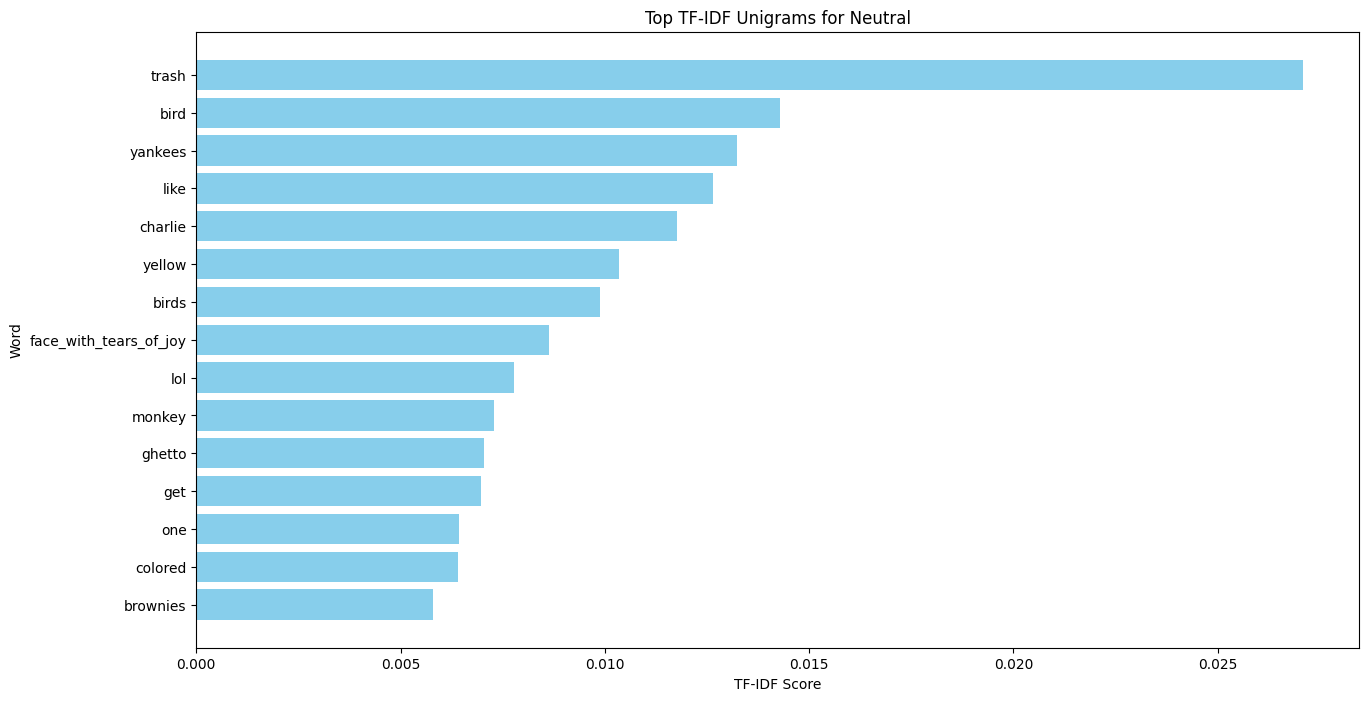

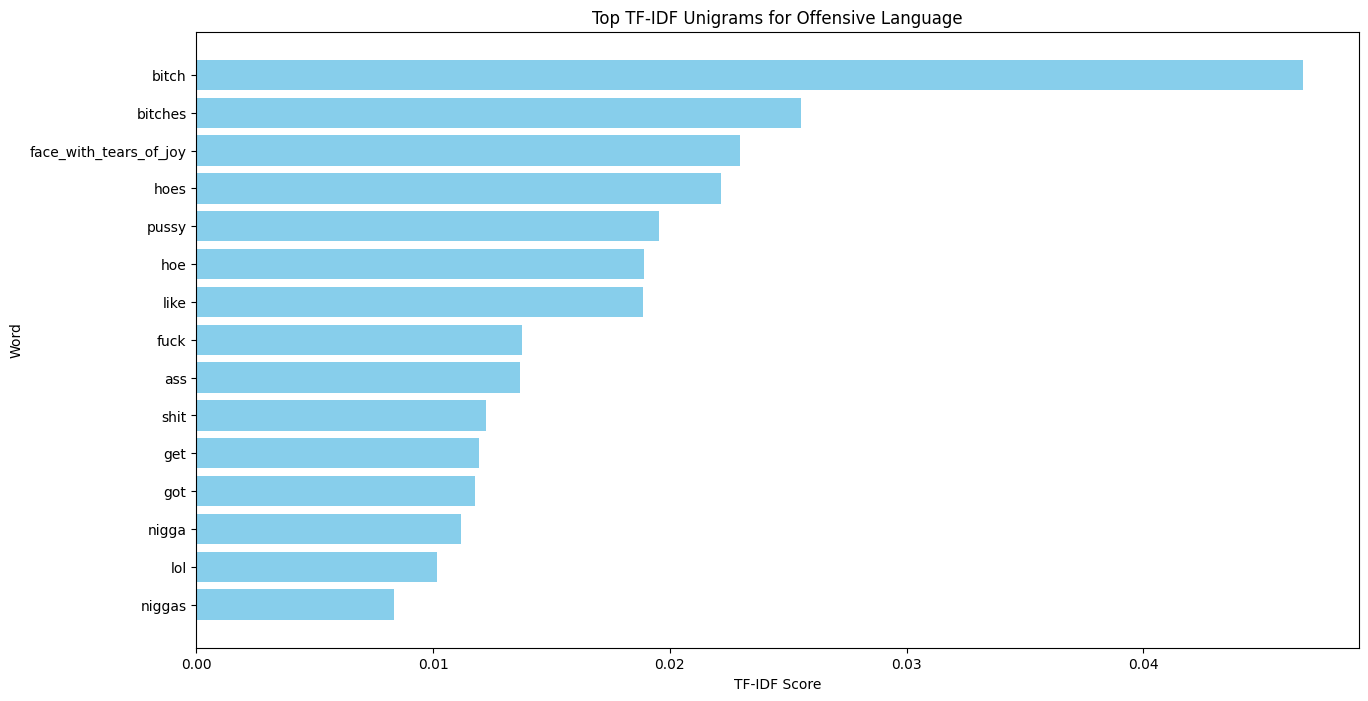

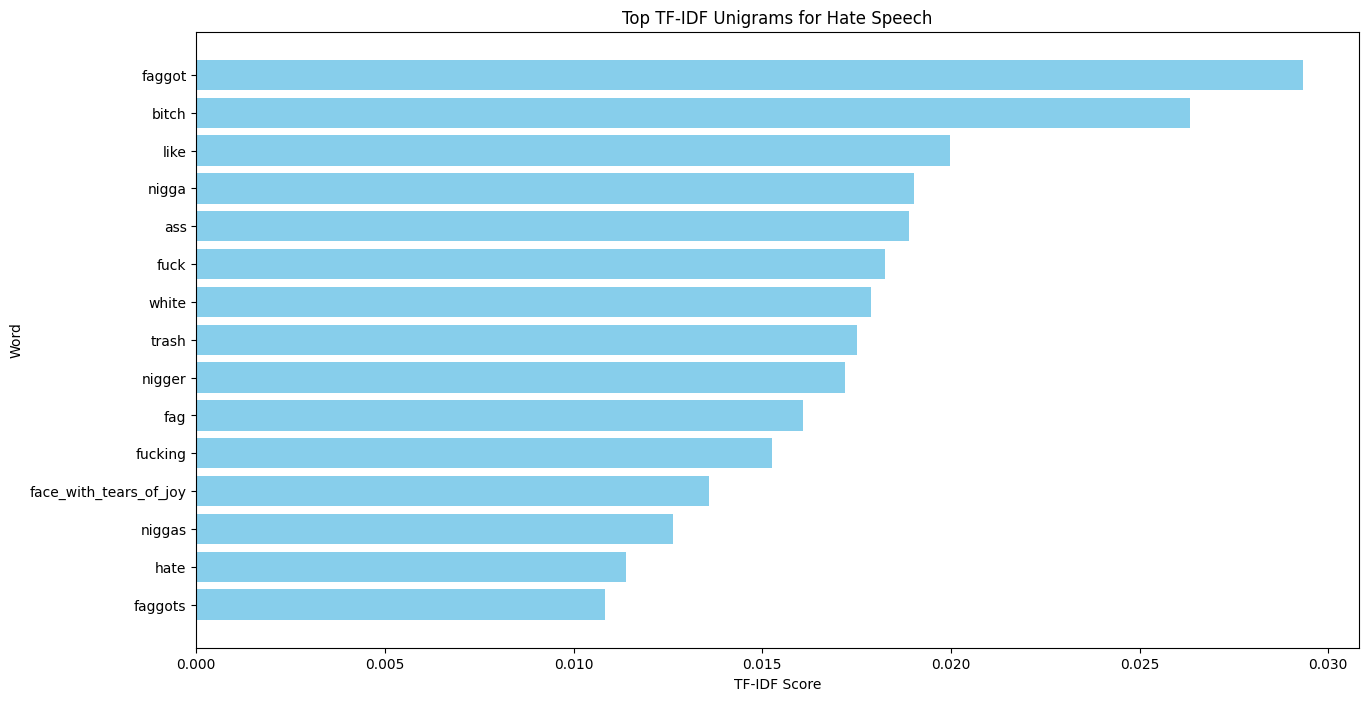

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

def visualize_tfidf(df, column):
    # Get unique categories from the specified column
    categories = df[column].unique()

    # Iterate over each category
    for category in categories:
        # Filter tweets by category
        tweets = df[df[column] == category]['tweet'].values.tolist()

        # TF-IDF Vectorization
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(tweets)

        # Get feature names
        feature_names = tfidf_vectorizer.get_feature_names_out()

        # Calculate TF-IDF scores
        tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]

        # Create a DataFrame for TF-IDF scores
        df_tfidf = pd.DataFrame(list(zip(feature_names, tfidf_scores)), columns=['Word', 'TF-IDF'])
        df_tfidf = df_tfidf.sort_values(by='TF-IDF', ascending=False).head(15)  # Display top 30 words with highest TF-IDF

        # Plot for each category
        plt.figure(figsize=(15, 8))
        plt.barh(df_tfidf['Word'], df_tfidf['TF-IDF'], color='skyblue')
        plt.xlabel('TF-IDF Score')
        plt.ylabel('Word')
        plt.title(f'Top TF-IDF Unigrams for {category}')
        plt.gca().invert_yaxis() 
        plt.savefig(f'../results/Top_unigrams_{category}.png')
        plt.show()

# Visualize TF-IDF for each category in the 'label_category' column
visualize_tfidf(data_ready, 'label_category')

# Bigram Word Importance

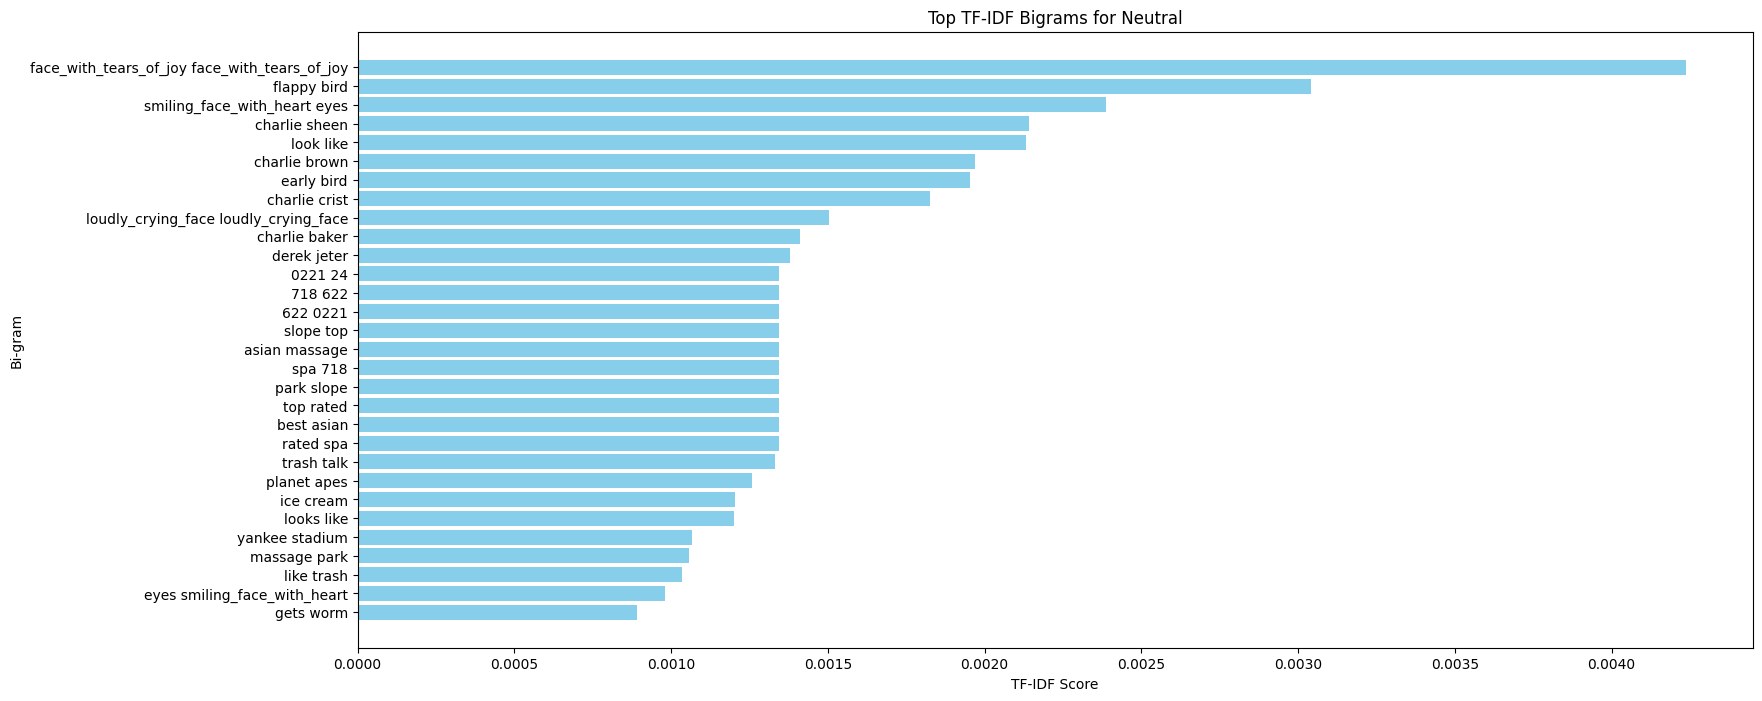

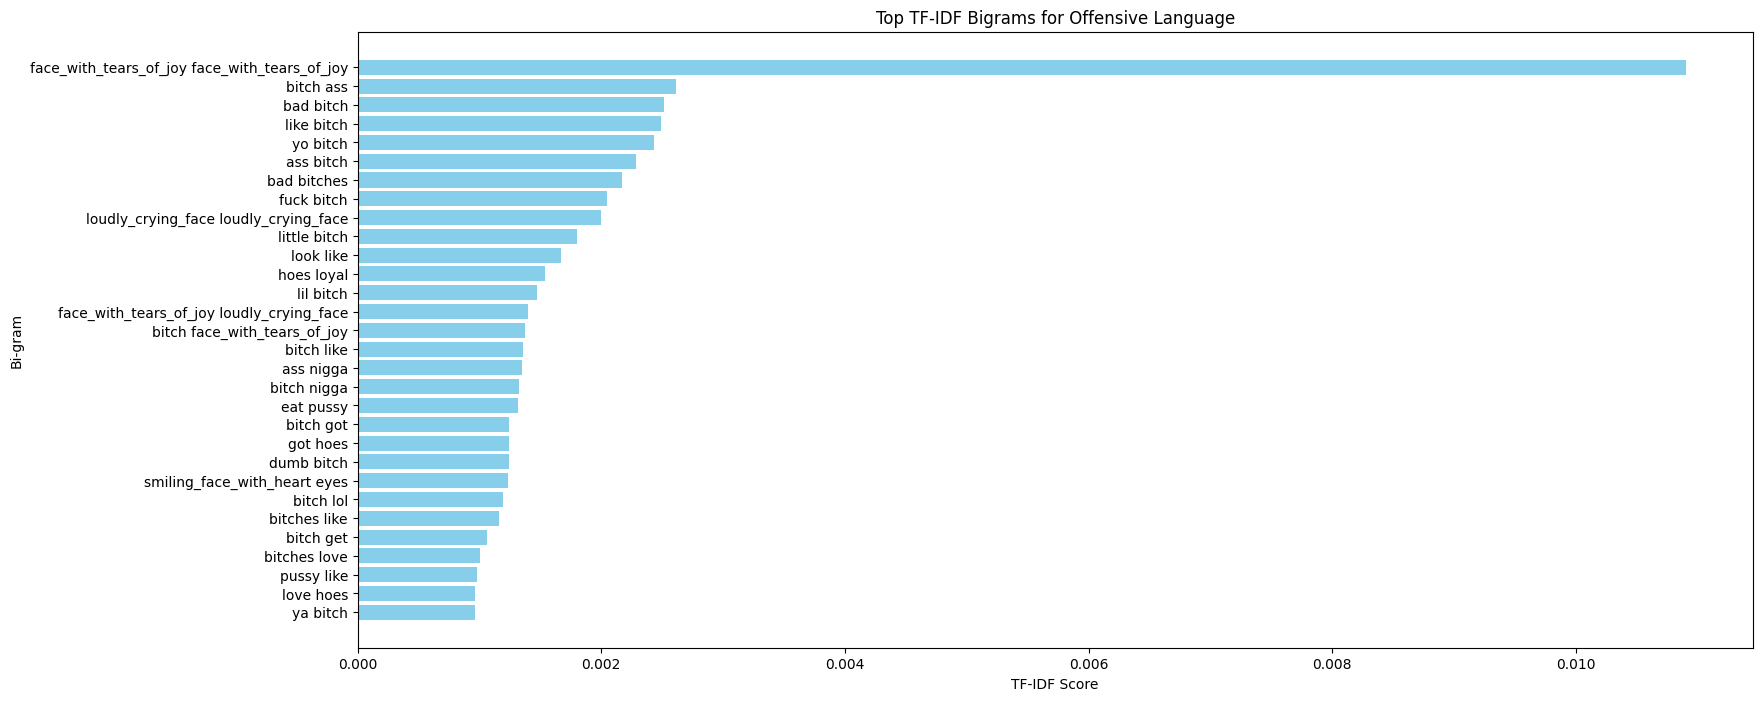

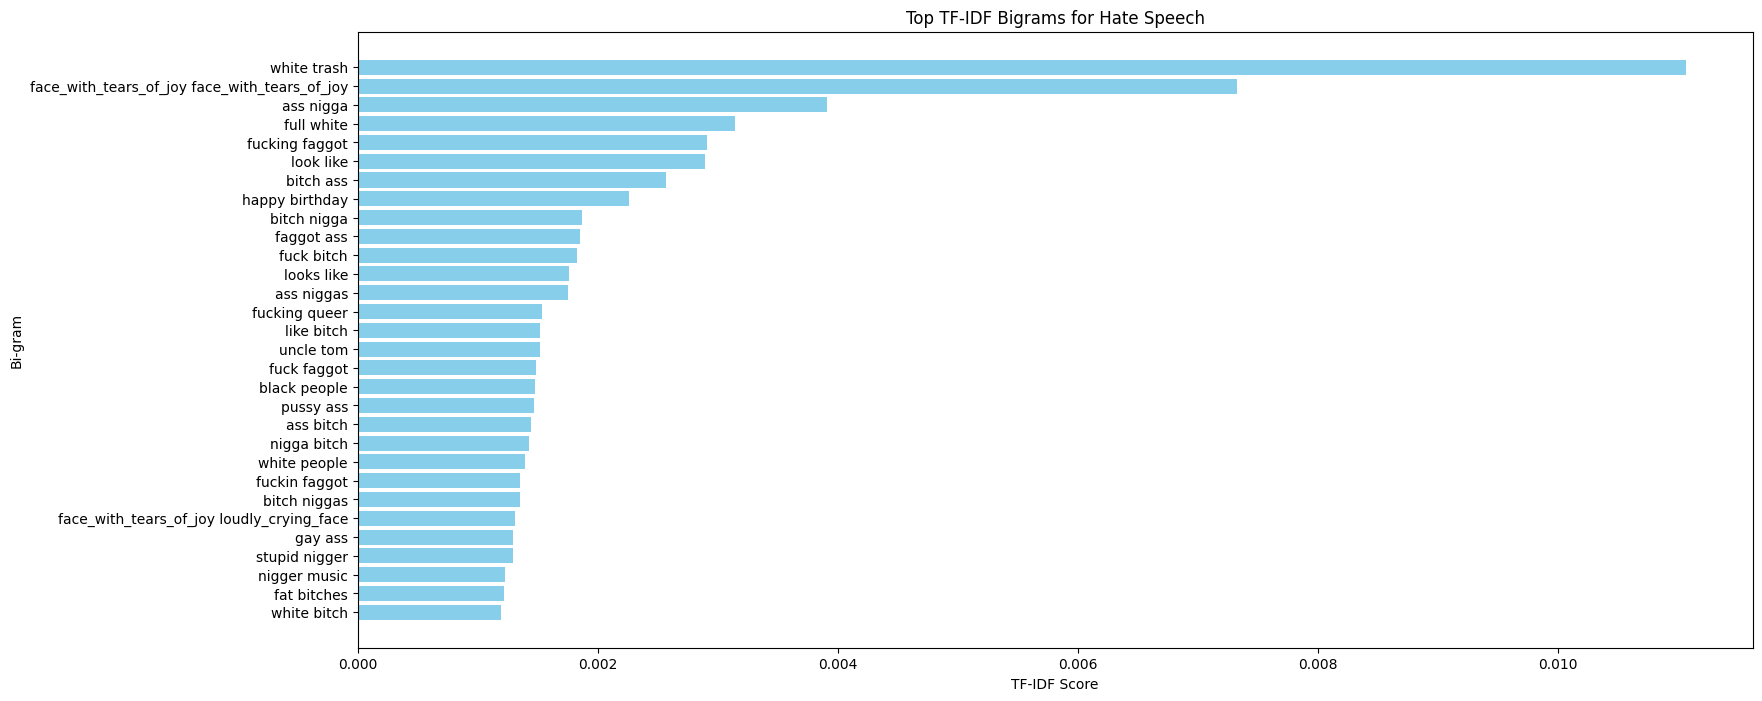

In [15]:
def visualize_tfidf_bi_grams(df, column, n_grams=(2, 2)):
    # Get unique categories from the specified column
    categories = df[column].unique()

    # Iterate over each category
    for category in categories:
        # Filter tweets by category
        tweets = df[df[column] == category]['tweet'].values.tolist()

        # TF-IDF Vectorization with bi-grams
        tfidf_vectorizer = TfidfVectorizer(ngram_range=n_grams)
        tfidf_matrix = tfidf_vectorizer.fit_transform(tweets)

        # Get feature names
        feature_names = tfidf_vectorizer.get_feature_names_out()

        # Calculate TF-IDF scores
        tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]

        # Create a DataFrame for TF-IDF scores
        df_tfidf = pd.DataFrame(list(zip(feature_names, tfidf_scores)), columns=['Word', 'TF-IDF'])
        df_tfidf = df_tfidf.sort_values(by='TF-IDF', ascending=False).head(30)  

        # Plot for each category
        plt.figure(figsize=(18, 8))
        plt.barh(df_tfidf['Word'], df_tfidf['TF-IDF'], color='skyblue')
        plt.xlabel('TF-IDF Score')
        plt.ylabel('Bi-gram')
        plt.title(f'Top TF-IDF Bigrams for {category}')
        plt.gca().invert_yaxis() 
        plt.savefig(f'../results/Top_bigrams_{category}.png')
        plt.show()

# Visualize TF-IDF for each category in the 'label_category' column based on bi-grams
visualize_tfidf_bi_grams(data_ready, 'label_category')

# Intersection

Intersection hate speech & offensive language: {'like', 'fuck', 'face_with_tears_of_joy', 'ass', 'niggas', 'get', 'hoes', 'nigga', 'fucking', 'bitches', 'bitch'}
Intersection hate speech & neutral: {'trash', 'face_with_tears_of_joy', 'like', 'get'}
Intersection offensive language & neutral: {'like', 'face_with_tears_of_joy', 'love', 'get', 'lol', 'got'}
Intersection of All Labels: {'like', 'face_with_tears_of_joy', 'get'}


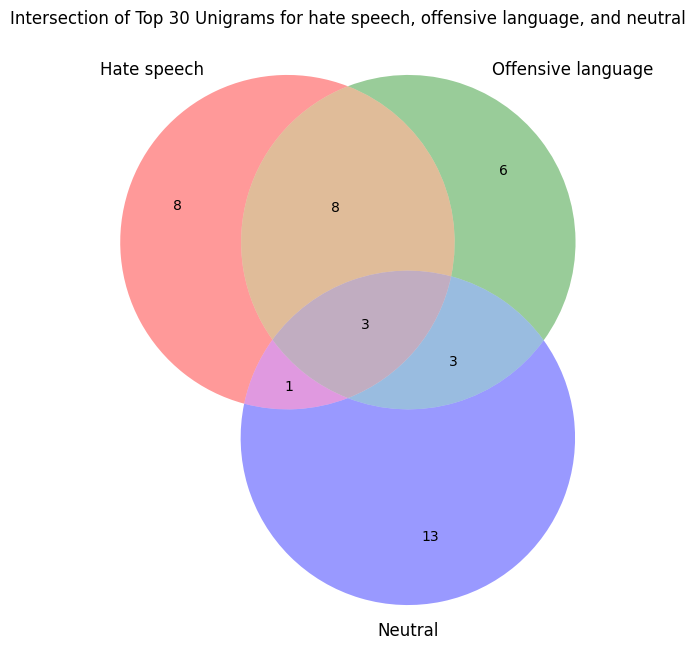

In [13]:
def get_top_tfidf_words(df, label):
    # Filter tweets by label
    tweets = df[df['label'] == label]['tweet'].values.tolist()

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(tweets)

    # Get feature names
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Calculate TF-IDF scores
    tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]

    # Create a DataFrame for TF-IDF scores
    df_tfidf = pd.DataFrame(list(zip(feature_names, tfidf_scores)), columns=['Word', 'TF-IDF'])
    df_tfidf = df_tfidf.sort_values(by='TF-IDF', ascending=False).head(20)  # Get top 30 words with highest TF-IDF
    return set(df_tfidf['Word'])  # Return the set of top words

# Get top TF-IDF words for each label
top_words_label0 = get_top_tfidf_words(data_ready, 0)
top_words_label1 = get_top_tfidf_words(data_ready, 1)
top_words_label2 = get_top_tfidf_words(data_ready, 2)

# Calculate intersections
intersection_01 = top_words_label0.intersection(top_words_label1)
intersection_02 = top_words_label0.intersection(top_words_label2)
intersection_12 = top_words_label1.intersection(top_words_label2)
intersection_all = top_words_label0.intersection(top_words_label1, top_words_label2)

# Print intersections
print("Intersection hate speech & offensive language:", intersection_01)
print("Intersection hate speech & neutral:", intersection_02)
print("Intersection offensive language & neutral:", intersection_12)
print("Intersection of All Labels:", intersection_all)

# Visualize intersections with Venn diagram
from matplotlib_venn import venn3
plt.figure(figsize=(12, 8))

venn3(subsets=(len(top_words_label0 - top_words_label1 - top_words_label2),
               len(top_words_label1 - top_words_label0 - top_words_label2),
               len(top_words_label0 & top_words_label1 - top_words_label2),
               len(top_words_label2 - top_words_label0 - top_words_label1),
               len(top_words_label0 & top_words_label2 - top_words_label1),
               len(top_words_label1 & top_words_label2 - top_words_label0),
               len(top_words_label0 & top_words_label1 & top_words_label2)),
      set_labels=('Hate speech', 'Offensive language', 'Neutral'))
# set size
plt.title("Intersection of Top 30 Unigrams for hate speech, offensive language, and neutral")
plt.savefig('../results/intersection_unigrams_diagram.png')
plt.show()


Intersection hate speech & offensive language: {'face_with_tears_of_joy face_with_tears_of_joy', 'loudly_crying_face loudly_crying_face', 'smiling_face_with_heart eyes', 'look like'}
Intersection hate speech & neutral: {'face_with_tears_of_joy face_with_tears_of_joy', 'looks like', 'look like'}
Intersection offensive language & neutral: {'face_with_tears_of_joy face_with_tears_of_joy', 'fuck bitch', 'ass bitch', 'face_with_tears_of_joy loudly_crying_face', 'bitch nigga', 'look like', 'ass nigga', 'bitch ass', 'like bitch'}
Intersection of All Labels: {'face_with_tears_of_joy face_with_tears_of_joy', 'look like'}


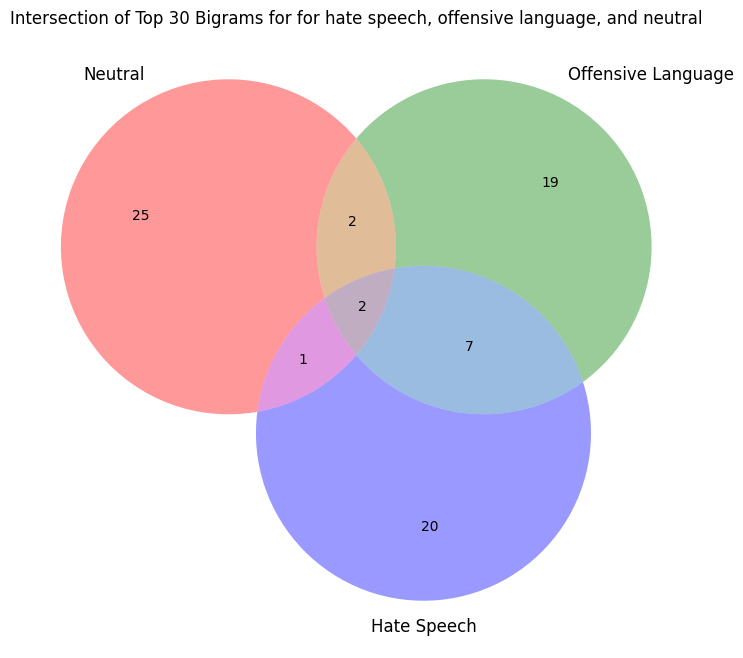

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

def visualize_tfidf_bi_grams(df, column, n_grams=(2, 2)):
    # Get unique categories from the specified column
    categories = df[column].unique()

    # Initialize a dictionary to store top bi-grams for each category
    top_bigrams_per_category = {}

    # Iterate over each category
    for category in categories:
        # Filter tweets by category
        tweets = df[df[column] == category]['tweet'].values.tolist()

        # TF-IDF Vectorization with bi-grams
        tfidf_vectorizer = TfidfVectorizer(ngram_range=n_grams)
        tfidf_matrix = tfidf_vectorizer.fit_transform(tweets)

        # Get feature names
        feature_names = tfidf_vectorizer.get_feature_names_out()

        # Calculate TF-IDF scores
        tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]

        # Create a DataFrame for TF-IDF scores
        df_tfidf = pd.DataFrame(list(zip(feature_names, tfidf_scores)), columns=['Bi-gram', 'TF-IDF'])
        df_tfidf = df_tfidf.sort_values(by='TF-IDF', ascending=False).head(30)  # Display top 30 bi-grams with highest TF-IDF

        # Store top bi-grams for the category
        top_bigrams_per_category[category] = set(df_tfidf['Bi-gram'])

    # Calculate intersections of top bi-grams across categories
    intersection_01 = top_bigrams_per_category[categories[0]] & top_bigrams_per_category[categories[1]]
    intersection_02 = top_bigrams_per_category[categories[0]] & top_bigrams_per_category[categories[2]]
    intersection_12 = top_bigrams_per_category[categories[1]] & top_bigrams_per_category[categories[2]]
    intersection_all = top_bigrams_per_category[categories[0]] & top_bigrams_per_category[categories[1]] & top_bigrams_per_category[categories[2]]

    # Print intersections
    print("Intersection hate speech & offensive language:", intersection_01)
    print("Intersection hate speech & neutral:", intersection_02)
    print("Intersection offensive language & neutral:", intersection_12)
    print("Intersection of All Labels:", intersection_all)

    # Visualize intersections with Venn diagram
    from matplotlib_venn import venn3
    
    plt.figure(figsize=(12, 8))

    venn3(subsets=(len(top_bigrams_per_category[categories[0]] - top_bigrams_per_category[categories[1]] - top_bigrams_per_category[categories[2]]),
                   len(top_bigrams_per_category[categories[1]] - top_bigrams_per_category[categories[0]] - top_bigrams_per_category[categories[2]]),
                   len(top_bigrams_per_category[categories[0]] & top_bigrams_per_category[categories[1]] - top_bigrams_per_category[categories[2]]),
                   len(top_bigrams_per_category[categories[2]] - top_bigrams_per_category[categories[0]] - top_bigrams_per_category[categories[1]]),
                   len(top_bigrams_per_category[categories[0]] & top_bigrams_per_category[categories[2]] - top_bigrams_per_category[categories[1]]),
                   len(top_bigrams_per_category[categories[1]] & top_bigrams_per_category[categories[2]] - top_bigrams_per_category[categories[0]]),
                   len(top_bigrams_per_category[categories[0]] & top_bigrams_per_category[categories[1]] & top_bigrams_per_category[categories[2]])),
          set_labels=(categories[0], categories[1], categories[2]))
    
    plt.title("Intersection of Top 30 Bigrams for for hate speech, offensive language, and neutral")
    plt.savefig('../results/intersection_bigrams_diagram.png')
    plt.show()

# Visualize intersections of top TF-IDF bi-grams for different categories
visualize_tfidf_bi_grams(data_ready, 'label_category')
